## **Accessing the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

## **Loading dataset**

In [ ]:
dataset_path = '/content/drive/My Drive/Nutrition_recommendation_system/Chronic_disease_less.csv'
df = pd.read_csv(dataset_path)

In [ ]:
df.head(10)

,Patient ID,Disease Name,Gender,Age,BMI,Smoking,Alcohol Consumption,Food Preference,Food Allergies,Blood Glucose(mg/dL),Blood Pressure(mmHg),Symptoms,Nutritional Requirement,Cholesterol Levels(mg/dL),Kidney Function (mg/dL),Caloric Intake,Hydration Level,Meal
0,1,Asthma,Male,42,15.8,No,No,Non-Vegetarian,Seafood,160.0,120/80,Chest tightness,Low,200,NaN,2000.0,Moderate,Chicken Biryani with Low-Fat Yogurt
1,2,Asthma,Female,61,22.8,No,Yes,Non-Vegetarian,Seafood,140.0,110/70,Swelling,Moderate,200,0.9,1800.0,Moderate,Fish Curry with Brown Rice
2,3,Asthma,Male,55,18.4,No,Yes,Vegan,Dairy,200.0,120/80,Shortness of Breath,High,180,1.5,1200.0,Moderate,Sweet Potato and Chickpea Stew
3,4,Asthma,Female,55,38.5,No,Yes,Non-Vegetarian,Seafood,160.0,120/80,Shortness of Breath,Moderate,200,1.5,2500.0,Moderate,Chicken Biryani with Low-Fat Yogurt
4,5,Asthma,Male,43,19.3,No,No,Vegan,Seafood,NaN,140/90,Swelling,Low,250,NaN,1500.0,Low,Grilled Tofu with Brown Rice
5,6,Asthma,Male,44,21.8,No,Yes,Vegetarian,Nuts,160.0,120/80,Chest tightness,Moderate,180,1.5,1800.0,Moderate,Vegetable Khichdi
6,7,Asthma,Female,40,30.2,Yes,No,Non-Vegetarian,Gluten,200.0,120/80,Swelling,Moderate,220,1.5,1200.0,Low,Grilled Fish with Avocado Salad
7,8,Asthma,Male,42,26.0,Yes,Yes,Non-Vegetarian,Gluten,180.0,120/80,Chest tightness,High,250,NaN,1500.0,Low,Egg Salad with Vegetables
8,9,Asthma,Female,49,32.7,No,No,Vegan,NaN,160.0,130/85,Fatigue,High,250,1.5,2200.0,High,Sweet Potato and Chickpea Stew
9,10,Asthma,Female,63,29.9,No,No,Vegetarian,Gluten,160.0,140/90,Chest tightness,Low,200,NaN,2200.0,High,Methi Paratha with Yogurt


In [ ]:
df.shape

(16283, 18)

In [ ]:
df.describe()

,Patient ID,Age,BMI,Blood Glucose(mg/dL),Cholesterol Levels(mg/dL),Kidney Function (mg/dL),Caloric Intake
count,16283.000000,16283.000000,16283.000000,15483.000000,16283.000000,11275.000000,16283.000000
mean,8142.000000,52.595038,27.469226,166.504812,188.165756,1.288831,1884.856261
std,4700.641552,7.538110,6.844310,26.595163,27.465248,0.563894,379.696082
min,1.000000,40.000000,15.000000,70.000000,119.000000,0.500000,471.000000
25%,4071.500000,46.000000,21.900000,140.000000,170.000000,0.900000,1800.000000
50%,8142.000000,53.000000,27.400000,160.000000,186.000000,1.380000,2000.000000
75%,12212.500000,59.000000,32.900000,180.000000,210.000000,1.500000,2100.000000
max,16283.000000,65.000000,95.200000,200.000000,250.000000,4.990000,5000.000000


## **Fix the column names**

In [ ]:
df.columns

Index(['Patient ID', 'Disease Name', 'Gender', 'Age', 'BMI', 'Smoking',
       'Alcohol Consumption', 'Food Preference', 'Food Allergies',
       'Blood Glucose(mg/dL)', 'Blood Pressure(mmHg)', 'Symptoms',
       'Nutritional Requirement', 'Cholesterol Levels(mg/dL)',
       'Kidney Function (mg/dL)', 'Caloric Intake', 'Hydration Level', 'Meal'],
      dtype='object')

In [ ]:
df.rename(columns={'Blood Glucose(mg/dL)': 'Blood_Glucose',
                   'Cholesterol Levels(mg/dL)':'Cholesterol_Levels',
                   'Blood Pressure(mmHg)':'Blood_Pressure',
                   'Kidney Function (mg/dL)': 'Kidney_Function'}, inplace=True)

In [ ]:
df.columns

Index(['Patient ID', 'Disease Name', 'Gender', 'Age', 'BMI', 'Smoking',
       'Alcohol Consumption', 'Food Preference', 'Food Allergies',
       'Blood_Glucose', 'Blood_Pressure', 'Symptoms',
       'Nutritional Requirement', 'Cholesterol_Levels', 'Kidney_Function',
       'Caloric Intake', 'Hydration Level', 'Meal'],
      dtype='object')

## **Fix the datatype**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16283 entries, 0 to 16282
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient ID               16283 non-null  int64  
 1   Disease Name             16283 non-null  object 
 2   Gender                   16283 non-null  object 
 3   Age                      16283 non-null  int64  
 4   BMI                      16283 non-null  float64
 5   Smoking                  16283 non-null  object 
 6   Alcohol Consumption      16283 non-null  object 
 7   Food Preference          16283 non-null  object 
 8   Food Allergies           15612 non-null  object 
 9   Blood_Glucose            15483 non-null  float64
 10  Blood_Pressure           16283 non-null  object 
 11  Symptoms                 16283 non-null  object 
 12  Nutritional Requirement  16283 non-null  object 
 13  Cholesterol_Levels       16283 non-null  int64  
 14  Kidney_Function       

In [ ]:
def categorize_blood_pressure(bp):
    systolic, diastolic = map(int, bp.split('/'))
    if systolic < 120 and diastolic < 80:
        return 'Normal'
    elif 120 <= systolic < 130 and diastolic < 80:
        return 'Elevated'
    elif systolic < 140 or diastolic < 90:
        return 'High'
    else:
        return 'Hypertension'

df['Blood_Pressure_Category'] = df['Blood_Pressure'].apply(categorize_blood_pressure)

In [ ]:
df.drop('Blood_Pressure', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16283 entries, 0 to 16282
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient ID               16283 non-null  int64  
 1   Disease Name             16283 non-null  object 
 2   Gender                   16283 non-null  object 
 3   Age                      16283 non-null  int64  
 4   BMI                      16283 non-null  float64
 5   Smoking                  16283 non-null  object 
 6   Alcohol Consumption      16283 non-null  object 
 7   Food Preference          16283 non-null  object 
 8   Food Allergies           15612 non-null  object 
 9   Blood_Glucose            15483 non-null  float64
 10  Symptoms                 16283 non-null  object 
 11  Nutritional Requirement  16283 non-null  object 
 12  Cholesterol_Levels       16283 non-null  int64  
 13  Kidney_Function          11275 non-null  float64
 14  Caloric Intake        

## **Exploratory Data Analysis**

### **Univariate Analysis of Numerical Columns**

In [ ]:
def numeric_univariate_analysis(num_data, col_name):
    print('*' * 5, col_name, '*' * 5)
    print(num_data.agg(['min', 'max', 'mean', 'median', 'std', 'skew', 'kurt']))
    print()

In [ ]:
numeric_univariate_analysis(df['Age'],'Age')

***** Age *****
min       40.000000
max       65.000000
mean      52.595038
median    53.000000
std        7.538110
skew      -0.048166
kurt      -1.181774
Name: Age, dtype: float64



In [ ]:
numeric_univariate_analysis(df['BMI'],'BMI')

***** BMI *****
min       15.000000
max       95.200000
mean      27.469226
median    27.400000
std        6.844310
skew       0.219809
kurt       0.322027
Name: BMI, dtype: float64



In [ ]:
numeric_univariate_analysis(df['Caloric Intake'],'Caloric Intake')

***** Caloric Intake *****
min        471.000000
max       5000.000000
mean      1884.856261
median    2000.000000
std        379.696082
skew        -1.936750
kurt         4.771565
Name: Caloric Intake, dtype: float64



<Axes: ylabel='Density'>

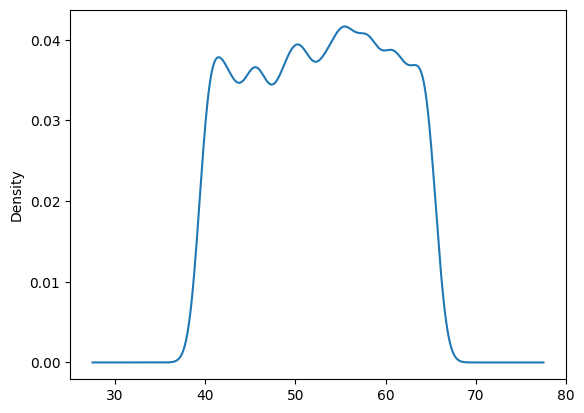

In [ ]:
df['Age'].plot(kind='kde')

<Axes: ylabel='Density'>

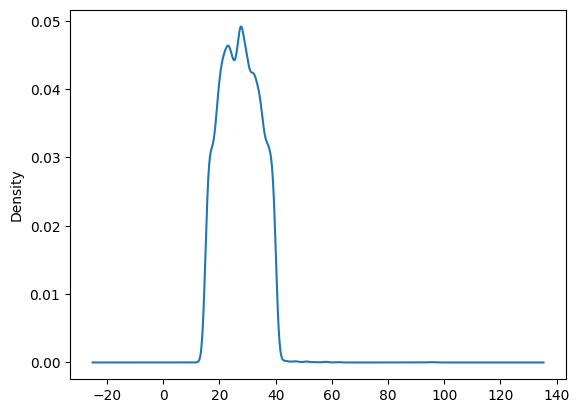

In [ ]:
df['BMI'].plot(kind='kde')

<Axes: ylabel='Density'>

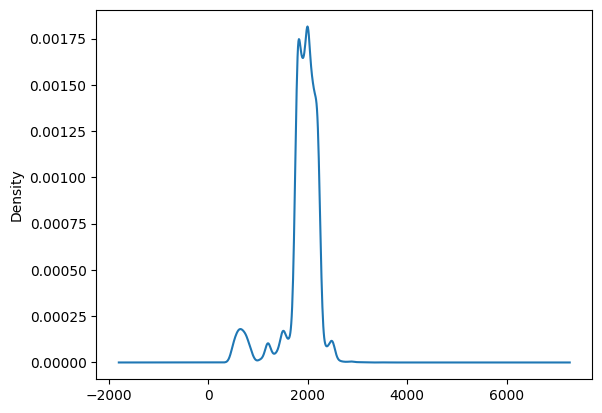

In [ ]:
df['Caloric Intake'].plot(kind='kde')

<Axes: >

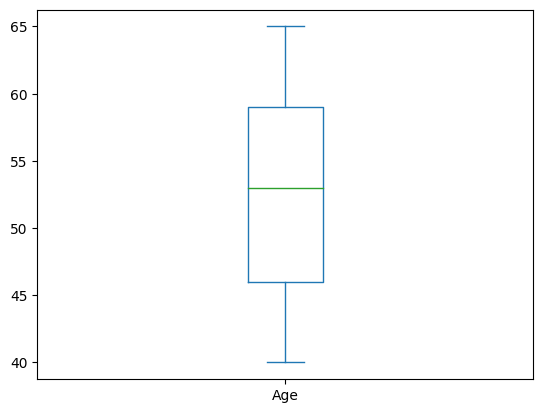

In [ ]:
df['Age'].plot(kind='box')

<Axes: >

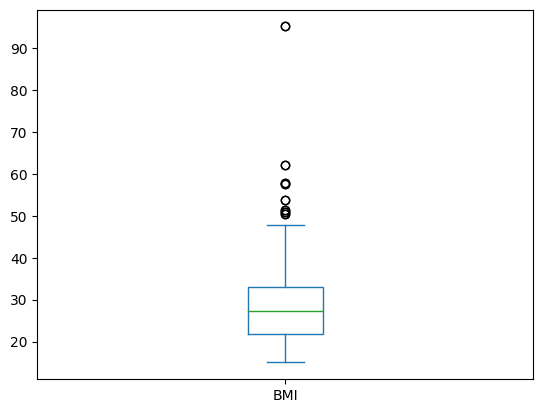

In [ ]:
df['BMI'].plot(kind='box')

<Axes: >

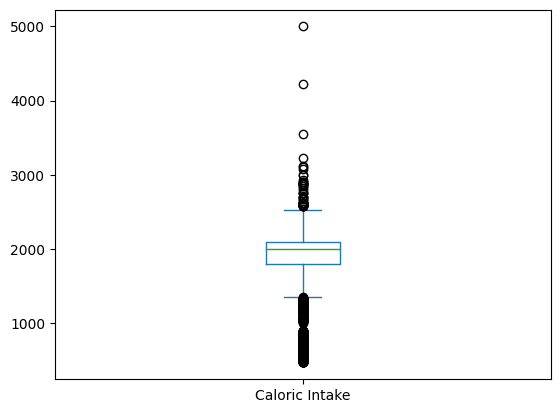

In [ ]:
df['Caloric Intake'].plot(kind='box')

In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df


In [ ]:
df = remove_outliers(df, 'BMI')

In [ ]:
df = remove_outliers(df, 'Caloric Intake')

<Axes: >

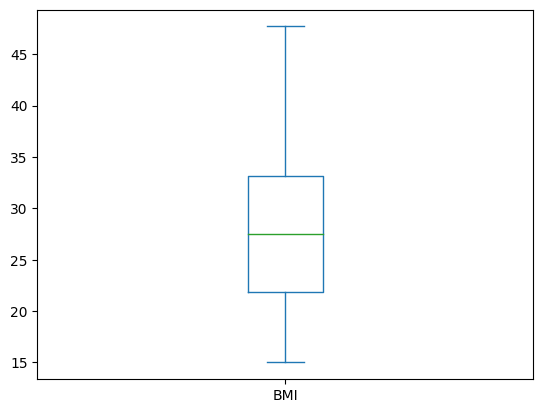

In [ ]:
df['BMI'].plot(kind='box')

<Axes: >

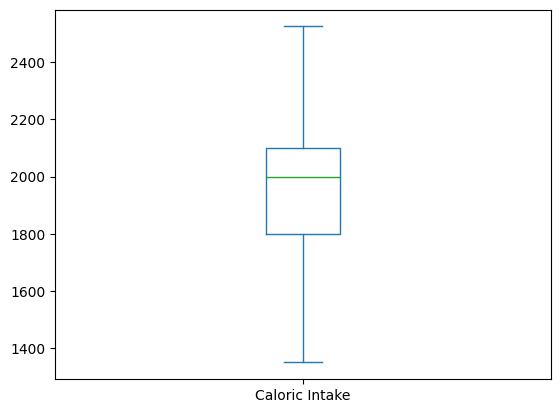

In [ ]:
df['Caloric Intake'].plot(kind='box')

In [ ]:
df.shape

(14914, 18)

### **Univariate Analysis of Categorical Columns**

In [ ]:
def categorical_univariate_analysis(cat_data):
    for col_name in cat_data.columns:
        print('*' * 5, col_name, '*' * 5)
        print('Count:', cat_data[col_name].count())
        print('Unique values:', cat_data[col_name].nunique())
        print('Unique categories:', cat_data[col_name].unique())
        #print('Value counts: \n', cat_data[col_name].value_counts(normalize=True))
        print()

In [ ]:
categorical_univariate_analysis(df[['Food Preference','Food Allergies','Symptoms','Meal']])

***** Food Preference *****
Count: 14914
Unique values: 3
Unique categories: ['Non-Vegetarian' 'Vegan' 'Vegetarian']

***** Food Allergies *****
Count: 14410
Unique values: 10
Unique categories: ['Seafood' 'Nuts' 'Gluten' nan 'Dairy' 'Peanuts' 'Tree nuts' 'Fish' 'Soy'
 'Eggs' 'Shellfish']

***** Symptoms *****
Count: 14914
Unique values: 22
Unique categories: ['Chest tightness' 'Swelling' 'Shortness of Breath' 'Fatigue' 'Wheezing'
 'Slow-healing sores or infections' 'Increased hunger' 'Excessive thirst'
 'Frequent urination' 'Blurred vision' 'Cough' 'Rash' 'Obesity'
 'Dizziness' 'Headache' 'Back pain' 'Abdominal pain' 'Nausea' 'Dark Urine'
 'Abdominal Pain' 'Loss of Appetite' 'Jaundice']

***** Meal *****
Count: 14914
Unique values: 48
Unique categories: ['Chicken Biryani with Low-Fat Yogurt' 'Fish Curry with Brown Rice'
 'Grilled Tofu with Brown Rice' 'Vegetable Khichdi'
 'Egg Salad with Vegetables' 'Sweet Potato and Chickpea Stew'
 'Methi Paratha with Yogurt' 'Masoor Dal and Rice'
 '

<Axes: xlabel='Food Preference'>

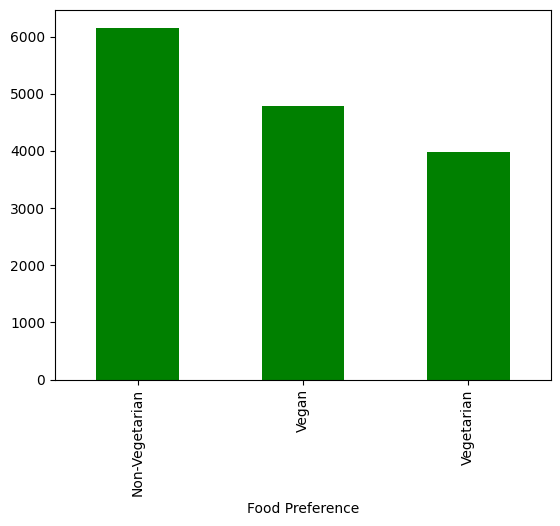

In [ ]:
df['Food Preference'].value_counts().plot(kind='bar', color='green')

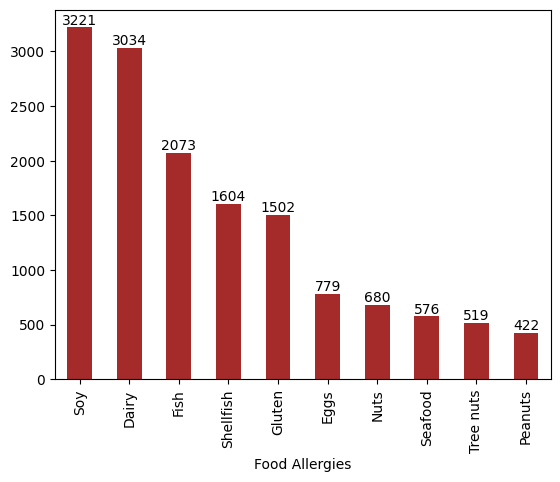

In [ ]:
ax = df['Food Allergies'].value_counts().plot(kind='bar', color='brown')
for index, value in enumerate(df['Food Allergies'].value_counts()):
    ax.text(index, value, str(value), ha='center', va='bottom')

plt.show()

<Axes: ylabel='Symptoms'>

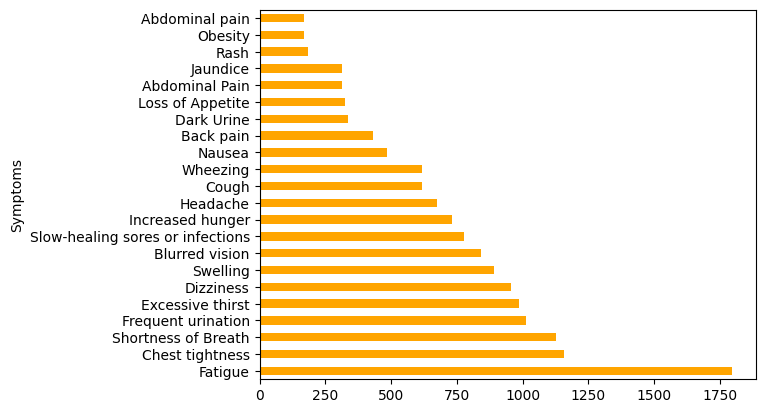

In [ ]:
df['Symptoms'].value_counts().plot(kind='barh', color='orange')

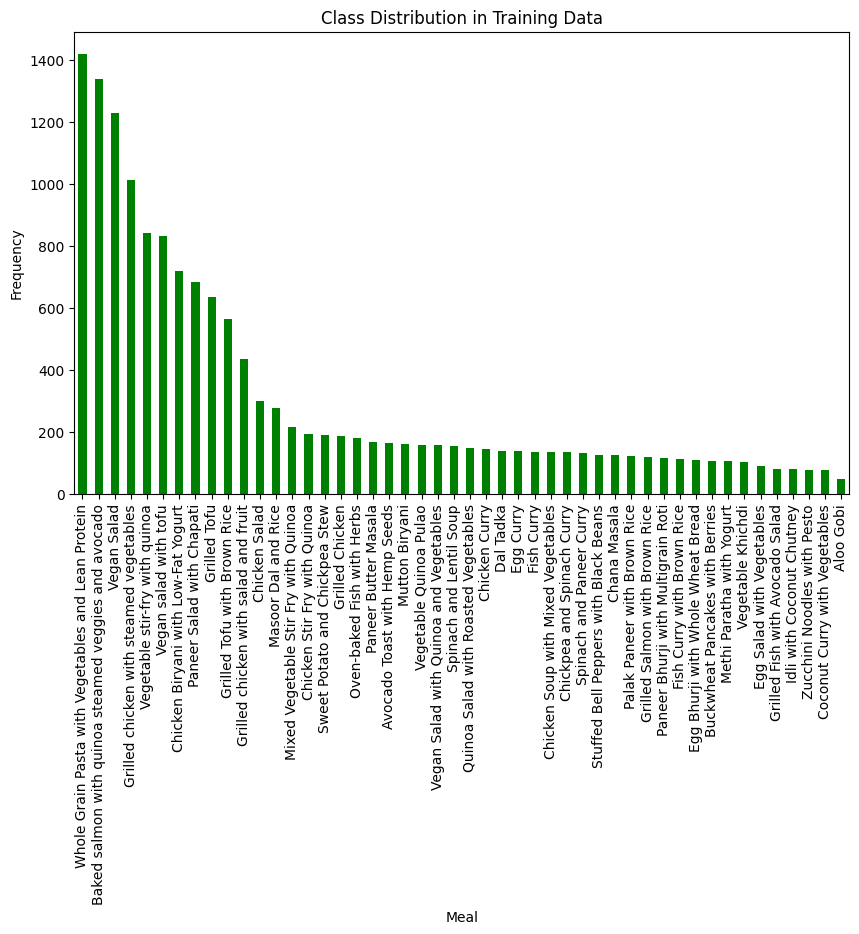

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Class Distribution in Training Data')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
df['Meal'].value_counts().plot(kind='bar', color='green')
plt.show()

In [ ]:
df['Meal'].value_counts()

,count
Meal,
Whole Grain Pasta with Vegetables and Lean Protein,1420
Baked salmon with quinoa steamed veggies and avocado,1337
Vegan Salad,1229
Grilled chicken with steamed vegetables,1014
Vegetable stir-fry with quinoa,841
Vegan salad with tofu,833
Chicken Biryani with Low-Fat Yogurt,720
Paneer Salad with Chapati,684
Grilled Tofu,636


In [ ]:
df['Meal'] = df['Meal'].str.strip().str.lower()

In [ ]:
df['Meal'].nunique()

48

### **Bivariate Analysis**

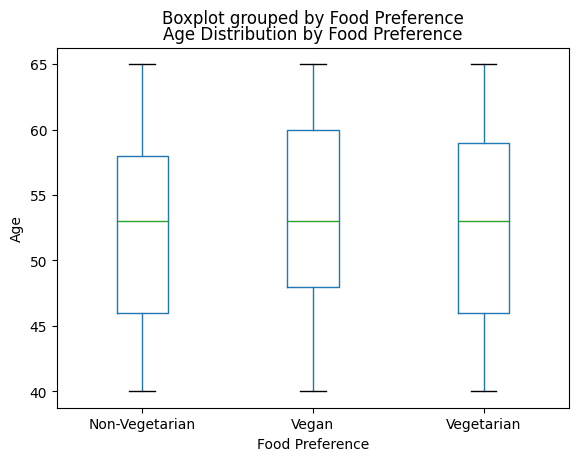

In [ ]:
df.boxplot(column='Age', by='Food Preference', grid=False)
plt.title('Age Distribution by Food Preference')
plt.xlabel('Food Preference')
plt.ylabel('Age')
plt.show()


In [ ]:
tab = pd.crosstab(df['Gender'],df['Disease Name'],normalize = 'index')
tab

Disease Name,Asthma,Cardiovascular Disease,Chronic Kidney Disease,Chronic Liver Disease,Diabetes
Gender,,,,,
Female,0.192964,0.261594,0.163513,0.095949,0.285981
Male,0.226451,0.238866,0.124831,0.118219,0.291633


<Axes: xlabel='Gender'>

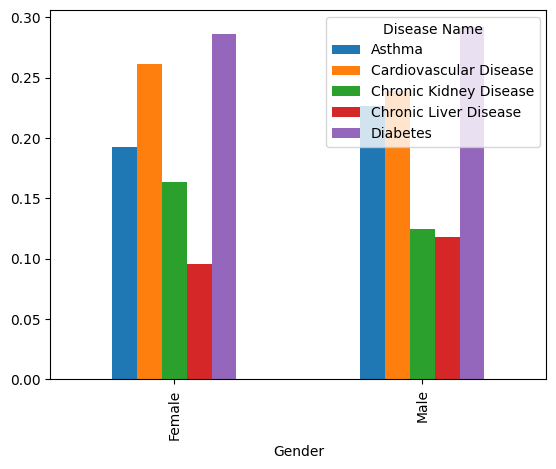

In [ ]:
tab.plot(kind='bar')

In [ ]:
tab1 = pd.crosstab(df['Gender'],df['Food Preference'],normalize = 'index')
tab1

Food Preference,Non-Vegetarian,Vegan,Vegetarian
Gender,,,
Female,0.424174,0.323161,0.252665
Male,0.401350,0.318084,0.280567


<Axes: xlabel='Gender'>

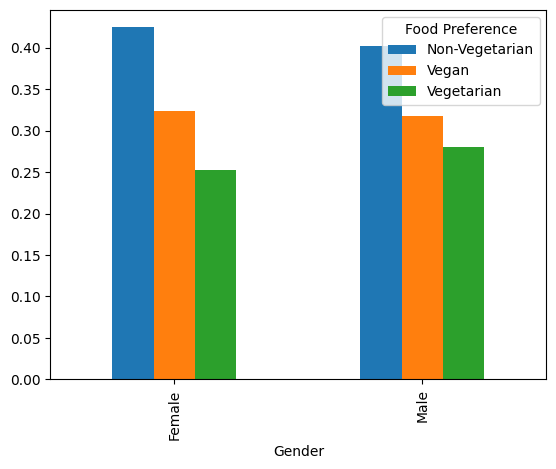

In [ ]:
tab1.plot(kind='bar')

In [ ]:
tab2 = pd.crosstab(df['Gender'],df['Food Allergies'],normalize = 'index')
tab2

Food Allergies,Dairy,Eggs,Fish,Gluten,Nuts,Peanuts,Seafood,Shellfish,Soy,Tree nuts
Gender,,,,,,,,,,
Female,0.196470,0.061354,0.155660,0.113332,0.046601,0.026748,0.040673,0.115125,0.207087,0.036950
Male,0.224815,0.046668,0.131899,0.095012,0.047785,0.031857,0.039262,0.107447,0.240184,0.035071


<Axes: xlabel='Gender'>

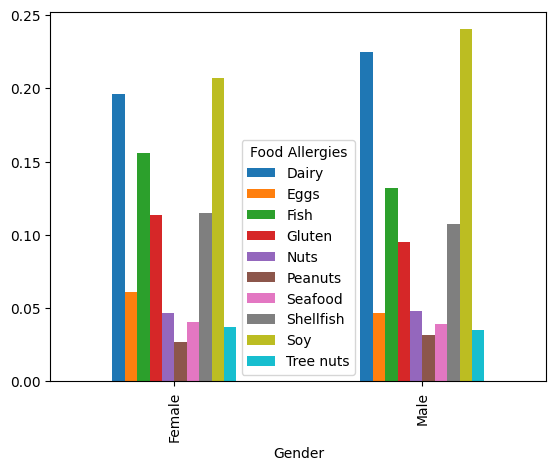

In [ ]:
tab2.plot(kind='bar')

In [ ]:
tab3 = pd.crosstab(df['Smoking'],df['Nutritional Requirement'],normalize = 'index')
tab3

Nutritional Requirement,High,Low,Moderate
Smoking,,,
No,0.288712,0.358430,0.352857
Yes,0.315586,0.359259,0.325154


In [ ]:
tab4 = pd.crosstab(df['Alcohol Consumption'],df['Food Allergies'],normalize = 'index')
tab4

Food Allergies,Dairy,Eggs,Fish,Gluten,Nuts,Peanuts,Seafood,Shellfish,Soy,Tree nuts
Alcohol Consumption,,,,,,,,,,
No,0.204903,0.059265,0.154001,0.105407,0.044557,0.025955,0.041240,0.123432,0.208075,0.033165
Yes,0.215786,0.049231,0.134448,0.103144,0.049632,0.032375,0.038796,0.100067,0.237860,0.038662


### **Multivariate Analysis**

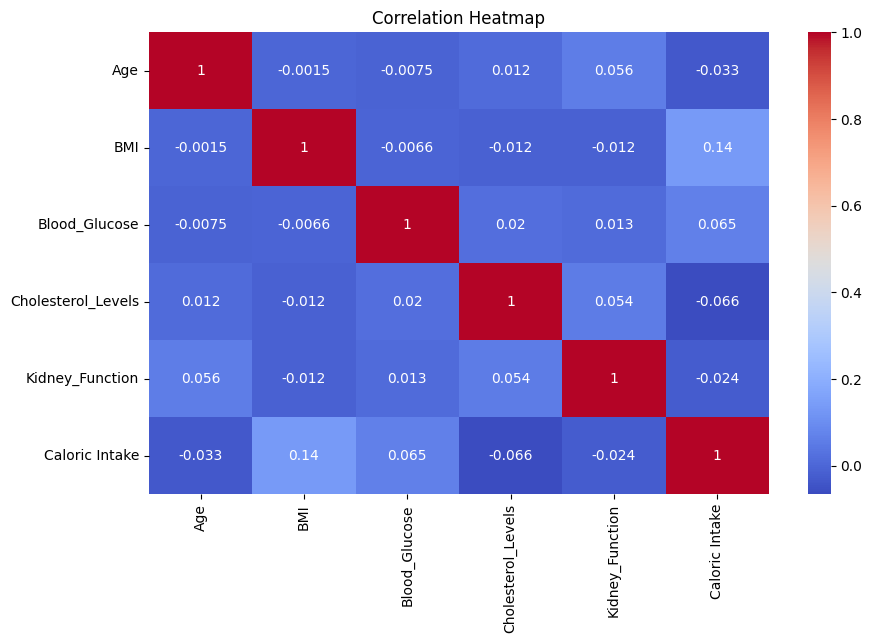

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Age', 'BMI', 'Blood_Glucose', 'Cholesterol_Levels', 'Kidney_Function', 'Caloric Intake']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## **Data Preprocessing**

### **Handling missing values**

In [ ]:
df.isnull().sum()

,0
Patient ID,0
Disease Name,0
Gender,0
Age,0
BMI,0
Smoking,0
Alcohol Consumption,0
Food Preference,0
Food Allergies,671
Blood_Glucose,800


In [ ]:
df['Kidney_Function'] = df['Kidney_Function'].fillna(-1)
df['Blood_Glucose'] = df['Blood_Glucose'].fillna(-1)

In [ ]:
df['Food Allergies'] = df['Food Allergies'].fillna('No Allergy')

In [ ]:
df.isnull().sum()

,0
Patient ID,0
Disease Name,0
Gender,0
Age,0
BMI,0
Smoking,0
Alcohol Consumption,0
Food Preference,0
Food Allergies,0
Blood_Glucose,0


### **Encoding categorical data**

In [ ]:
le = LabelEncoder()

In [ ]:
df['Gender'] = le.fit_transform(df['Gender'])
df['Smoking'] = le.fit_transform(df['Smoking'])
df['Alcohol Consumption'] = le.fit_transform(df['Alcohol Consumption'])
df['Food Preference'] = le.fit_transform(df['Food Preference'])
df['Nutritional Requirement'] = le.fit_transform(df['Nutritional Requirement'])
df['Blood_Pressure_Category'] = le.fit_transform(df['Blood_Pressure_Category'])
df['Hydration Level'] = le.fit_transform(df['Hydration Level'])
df['Disease Name'] = le.fit_transform(df['Disease Name'])
df['Food Allergies'] = le.fit_transform(df['Food Allergies'])
df['Symptoms'] = le.fit_transform(df['Symptoms'])

In [ ]:
df.head()

,Patient ID,Disease Name,Gender,Age,BMI,Smoking,Alcohol Consumption,Food Preference,Food Allergies,Blood_Glucose,Symptoms,Nutritional Requirement,Cholesterol_Levels,Kidney_Function,Caloric Intake,Hydration Level,Meal,Blood_Pressure_Category
0,1,0,1,42,15.8,0,0,0,7,160.0,4,1,200,-1.0,2000.0,2,Chicken Biryani with Low-Fat Yogurt,1
1,2,0,0,61,22.8,0,1,0,7,140.0,20,2,200,0.9,1800.0,2,Fish Curry with Brown Rice,3
2,3,0,1,55,18.4,0,1,1,0,200.0,18,0,180,1.5,1200.0,2,Sweet Potato and Chickpea Stew,1
3,4,0,0,55,38.5,0,1,0,7,160.0,18,2,200,1.5,2500.0,2,Chicken Biryani with Low-Fat Yogurt,1
4,5,0,1,43,19.3,0,0,1,7,-1.0,20,1,250,-1.0,1500.0,1,Grilled Tofu with Brown Rice,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16283 entries, 0 to 16282
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient ID               16283 non-null  int64  
 1   Disease Name             16283 non-null  int64  
 2   Gender                   16283 non-null  int64  
 3   Age                      16283 non-null  int64  
 4   BMI                      16283 non-null  float64
 5   Smoking                  16283 non-null  int64  
 6   Alcohol Consumption      16283 non-null  int64  
 7   Food Preference          16283 non-null  int64  
 8   Food Allergies           16283 non-null  int64  
 9   Blood_Glucose            16283 non-null  float64
 10  Symptoms                 16283 non-null  int64  
 11  Nutritional Requirement  16283 non-null  int64  
 12  Cholesterol_Levels       16283 non-null  int64  
 13  Kidney_Function          16283 non-null  float64
 14  Caloric Intake        

## **Feature Selection**

In [ ]:
X = df.drop(['Meal','Patient ID','Symptoms','Nutritional Requirement','Hydration Level','Gender'], axis=1)
y = df['Meal']

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

                    Feature  Importance
6            Food Allergies    0.214065
0              Disease Name    0.204320
5           Food Preference    0.132359
2                       BMI    0.086958
10           Caloric Intake    0.086357
1                       Age    0.069756
8        Cholesterol_Levels    0.062372
7             Blood_Glucose    0.046204
9           Kidney_Function    0.033891
11  Blood_Pressure_Category    0.027539
4       Alcohol Consumption    0.018153
3                   Smoking    0.018026


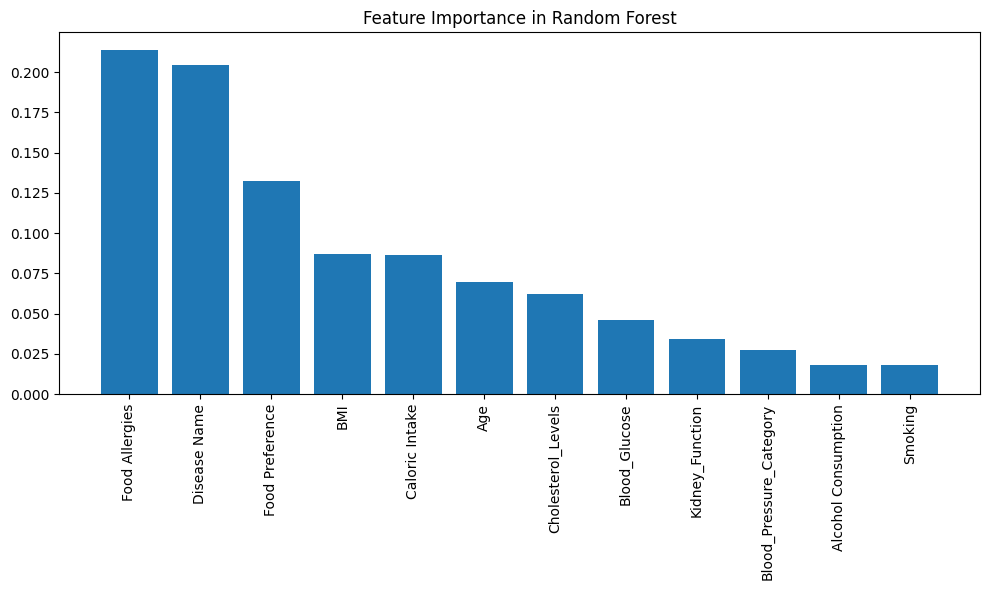

In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance in Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
'''n = 20
top_features = feature_importances['Feature'].head(n).values
X_selected = X[top_features]'''

"n = 20\ntop_features = feature_importances['Feature'].head(n).values\nX_selected = X[top_features]"

## **Model selection**

In [ ]:
def get_params(model, param_dist, loss_function, X_train, y_train, n_iter=100, random_state=42):
    warnings.filterwarnings("ignore")
    scorer = make_scorer(loss_function, greater_is_better=True)

    print(f'Getting :{model.__class__.__name__} params using RandomizedSearchCV:\n')

    random_search = RandomizedSearchCV(model, param_distributions=param_dist, scoring=scorer, cv=5,
                                       n_iter=n_iter, random_state=random_state)
    random_search.fit(X_train, y_train)

    best_model = random_search.best_estimator_
    best_params = best_model.get_params()

    param_string = " | ".join([f"{key}: {value}" for key, value in best_params.items() if value is not None])
    print(param_string)
    print('\n')

    return best_params

rf_param_dist = {
    'n_estimators': np.arange(50, 200, 10),
    'max_depth': [None] + list(np.arange(5, 20, 5)),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'bootstrap': [True, False]
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_accuracy_params = get_params(RandomForestClassifier(), rf_param_dist, accuracy_score, X_train, y_train, n_iter=100, random_state=42)


Getting :RandomForestClassifier params using RandomizedSearchCV:

bootstrap: True | ccp_alpha: 0.0 | criterion: gini | max_features: sqrt | min_impurity_decrease: 0.0 | min_samples_leaf: 1 | min_samples_split: 6 | min_weight_fraction_leaf: 0.0 | n_estimators: 90 | oob_score: False | verbose: 0 | warm_start: False




In [ ]:
model = RandomForestClassifier(**rf_accuracy_params)

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=6, n_estimators=90)

## **Prediction and Evaluation**

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9186367823150138


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred,zero_division=0)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[  0   0   0 ...   0   0   0]
 [  0  37   0 ...   0   0   0]
 [  0   0 284 ...   0   2   0]
 ...
 [  0   0   0 ... 166   0   0]
 [  0   0   2 ...   0 276   0]
 [  0   1   0 ...   0   0  10]]


In [ ]:
print("\nClassification Report:")
print(class_report)


Classification Report:
                                                      precision    recall  f1-score   support

                                           Aloo Gobi       0.00      0.00      0.00        12
                       Avocado Toast with Hemp Seeds       0.88      0.82      0.85        45
Baked salmon with quinoa steamed veggies and avocado       0.99      0.98      0.99       289
                     Buckwheat Pancakes with Berries       0.68      0.75      0.71        20
                                        Chana Masala       0.77      0.59      0.67        17
                 Chicken Biryani with Low-Fat Yogurt       0.99      0.96      0.97       206
                                       Chicken Curry       0.82      0.72      0.77        32
                                       Chicken Salad       0.98      1.00      0.99        55
                  Chicken Soup with Mixed Vegetables       0.61      0.61      0.61        23
                        Chicken Sti

## **Save the model**

In [ ]:
joblib.dump(model, 'nutrition_recommendation_model.pkl')

## **Recommendation Logic**

In [ ]:
model = joblib.load('nutrition_recommendation_model.pkl')

alternative_meals = {  # Fixed the variable name from 'aalternative_meals' to 'alternative_meals'
    'vegan': [
        "Vegan Salad with Quinoa and Vegetables",
        "Sweet Potato and Chickpea Stew",
        "Grilled Tofu with Brown Rice",
        "Vegetable Khichdi",
        "Spinach and Lentil Soup",
        "Vegetable Stir-Fry with Quinoa",
        "Chickpea and Spinach Curry",
        "Buckwheat Pancakes with Berries",
        "Avocado Toast with Hemp Seeds"
    ],
    'vegetarian': [
        "Paneer Butter Masala",
        "Masoor Dal and Rice",
        "Vegetable Quinoa Pulao",
        "Spinach and Paneer Curry",
        "Idli with Coconut Chutney",
        "Palak Paneer with Brown Rice",
        "Vegetable Khichdi",
        "Methi Paratha with Yogurt",
        "Chana Masala",
        "Mixed Vegetable Stir Fry with Quinoa"
    ],
    'non-vegetarian': [
        "Chicken Biryani with Low-Fat Yogurt",
        "Fish Curry with Brown Rice",
        "Grilled Chicken with Steamed Vegetables",
        "Grilled Fish with Avocado Salad",
        "Oven-baked Fish with Herbs",
        "Grilled Chicken with Salad and Fruit",
        "Chicken Curry",
        "Mutton Biryani",
        "Grilled Salmon with Brown Rice"
    ]
}

def disease_specific_info(disease_name):
    info = {}
    if disease_name == 'diabetes':
        info['allergies'] = ["avoid high-sugar foods and processed foods (Dairy, Gluten, Soy)"]
        info['glucose_range'] = "Normal fasting blood glucose: 70-100 mg/dL"
        info['cholesterol_range'] = "Ideal cholesterol: < 200 mg/dL"
        info['caloric_intake'] = "1800-2200 calories/day (depending on activity level)"
        info['bmi_range'] = "Normal BMI: 18.5 - 24.9"

    elif disease_name == 'cardiovascular disease':
        info['allergies'] = ["avoid foods high in sodium, trans fats, and cholesterol(Shellfish, Eggs)"]
        info['glucose_range'] = "Normal fasting blood glucose: 70-100 mg/dL"
        info['cholesterol_range'] = "Ideal cholesterol: < 200 mg/dL"
        info['caloric_intake'] = "2000-2400 calories/day"
        info['bmi_range'] = "Normal BMI: 18.5 - 24.9"

    elif disease_name == 'asthma':
        info['allergies'] = ["avoid foods like Nuts, Peanuts, Shellfish, Fish, Dairy, Eggs"]
        info['glucose_range'] = "Normal fasting blood glucose: 70-100 mg/dL"
        info['cholesterol_range'] = "Ideal cholesterol: < 200 mg/dL"
        info['caloric_intake'] = "1800-2200 calories/day"
        info['bmi_range'] = "Normal BMI: 18.5 - 24.9"

    elif disease_name == 'chronic kidney disease':
        info['allergies'] = ["avoid foods high in potassium and phosphorus (Nuts, Tree nuts, Peanuts, Dairy, Shellfish)"]
        info['glucose_range'] = "Normal fasting blood glucose: 70-100 mg/dL"
        info['cholesterol_range'] = "Ideal cholesterol: < 200 mg/dL"
        info['caloric_intake'] = "1800-2200 calories/day"
        info['bmi_range'] = "Normal BMI: 18.5 - 24.9"

    elif disease_name == 'chronic liver disease':
        info['allergies'] = ["avoid alcohol and fatty foods(Shellfish, Dairy)"]
        info['glucose_range'] = "Normal fasting blood glucose: 70-100 mg/dL"
        info['cholesterol_range'] = "Ideal cholesterol: < 200 mg/dL"
        info['caloric_intake'] = "1600-2000 calories/day"
        info['bmi_range'] = "Normal BMI: 18.5 - 24.9"

    return info

def get_user_input():
    while True:
        try:
            disease_name = input("Enter Disease Name (Diabetes, Cardiovascular Disease, Chronic Kidney Disease, Asthma, Chronic Liver Disease): ").strip().lower()
            if disease_name not in ['diabetes', 'cardiovascular disease', 'chronic kidney disease', 'asthma', 'chronic liver disease']:
                raise ValueError("Invalid Disease Name")

            age = int(input("Enter your age: "))
            if age <= 0:
                raise ValueError("Age must be a positive integer")

            bmi = float(input(f"Enter your BMI (normal range for your age: {disease_specific_info(disease_name)['bmi_range']}): "))
            if bmi <= 0:
                raise ValueError("BMI must be a positive number")

            info = disease_specific_info(disease_name)

            print("\nImportant Information for", disease_name.title())
            print(f"  - Glucose Range: {info['glucose_range']}")
            print(f"  - Cholesterol Range: {info['cholesterol_range']}")
            print(f"  - Recommended Caloric Intake: {info['caloric_intake']}")
            print(f"  - Suggested Allergies to Avoid: {', '.join(info['allergies'])}\n")

            food_preference = input("Enter your food preference (Vegetarian, Vegan, Non-Vegetarian): ").strip().lower()
            if food_preference not in ['vegetarian', 'vegan', 'non-vegetarian']:
                raise ValueError("Invalid food preference option")

            allergy = input(f"Specify your food allergy (Suggested based on your disease: {', '.join(info['allergies'])}): ").strip().lower()

            blood_pressure = input("Enter your Blood Pressure Category (Normal, Elevated, High, Hypertension): ").strip().lower()
            if blood_pressure not in ['normal', 'elevated', 'high', 'hypertension']:
                raise ValueError("Invalid blood pressure option")

            glucose_level = int(input(f"Enter your Blood Glucose level (mg/dL, normal range: {info['glucose_range']}): "))
            if glucose_level < 0:
                raise ValueError("Glucose level must be a positive integer")

            smoking_status = input("Do you smoke? (Yes/No): ").strip().lower()
            if smoking_status not in ['yes', 'no']:
                raise ValueError("Invalid input for smoking status")

            alcohol_consumption = input("Do you consume alcohol? (Yes/No): ").strip().lower()
            if alcohol_consumption not in ['yes', 'no']:
                raise ValueError("Invalid input for alcohol consumption")

            cholesterol = int(input(f"Enter your Cholesterol level (mg/dL, ideal range: {info['cholesterol_range']}): "))
            if cholesterol <= 0:
                raise ValueError("Cholesterol must be a positive integer")

            desired_caloric_intake = int(input(f"Enter your desired caloric intake (recommended: {info['caloric_intake']}): "))
            if desired_caloric_intake <= 0:
                raise ValueError("Caloric intake must be a positive integer")

            if smoking_status == 'yes' or alcohol_consumption == 'yes':
                print("\nQuitting smoking and alcohol consumption significantly improves overall health. Consider quitting for a healthier life.\n")

            break  # Exit the loop if all inputs are valid

        except ValueError as ve:
            print(f"Error: {ve}. Please try again.")

    user_data = {
        'Age': age,
        'BMI': bmi,
        'Food Preference': food_preference,
        'Food Allergy': allergy,
        'Blood Pressure Level': blood_pressure,
        'Blood Glucose Level': glucose_level,
        'Disease Name': disease_name,
        'Smoking Status': smoking_status,
        'Alcohol Consumption': alcohol_consumption,
        'Cholesterol': cholesterol,
        'Caloric Intake': desired_caloric_intake
    }

    predict_meal(user_data)

def preprocess_input(user_data, encoders):
    age_bmi = np.array([[user_data['Age'], user_data['BMI']]])
    food_pref_encoded = encoders['food_preference'].transform([user_data['Food Preference']])
    food_allergy_encoded = encoders['food_allergy'].transform([user_data['Food Allergy']])
    disease_encoded = encoders['disease'].transform([user_data['Disease Name']])
    smoking_encoded = encoders['smoking_status'].transform([user_data['Smoking Status']])
    alcohol_encoded = encoders['alcohol_consumption'].transform([user_data['Alcohol Consumption']])
    blood_pressure_encoded = encoders['blood_pressure'].transform([user_data['Blood Pressure Level']])

    processed_data = np.concatenate((  # Use the correct axis for concatenation
        age_bmi, food_pref_encoded.reshape(-1, 1), food_allergy_encoded.reshape(-1, 1), disease_encoded.reshape(-1, 1),
        smoking_encoded.reshape(-1, 1), alcohol_encoded.reshape(-1, 1), blood_pressure_encoded.reshape(-1, 1),
        np.array([[user_data['Blood Glucose Level']]]),
        np.array([[user_data['Cholesterol']]]),
        np.array([[user_data['Caloric Intake']]])
    ), axis=None)

    return processed_data

def predict_meal(user_data):
    processed_data = preprocess_input(user_data, encoders)
    try:
        prediction = model.predict([processed_data])
        meal_plan = prediction[0]

        # Update meal preference checks with additional non-vegetarian options
        if user_data['Food Preference'] == 'vegan' and (
            'chicken' in meal_plan.lower() or
            'meat' in meal_plan.lower() or
            'fish' in meal_plan.lower() or
            'salmon' in meal_plan.lower() or
            'grilled' in meal_plan.lower()):

            print("Error: Non-vegan meal predicted. Re-checking meal options.")
            meal_plan = np.random.choice(alternative_meals['vegan'])

        elif user_data['Food Preference'] == 'vegetarian' and (
            'meat' in meal_plan.lower() or
            'fish' in meal_plan.lower() or
            'salmon' in meal_plan.lower() or
            'chicken' in meal_plan.lower()):
            print("Error: Non-vegetarian meal predicted. Re-checking meal options.")
            meal_plan = np.random.choice(alternative_meals['vegetarian'])

        elif user_data['Food Preference'] == 'non-vegetarian' and (
            'vegan' in meal_plan.lower() or
            'vegetarian' in meal_plan.lower()):
            print("Error: Vegetarian meal predicted. Re-checking meal options.")
            meal_plan = np.random.choice(alternative_meals['non-vegetarian'])

        print(f"\nSuggested Meal Plan: {meal_plan}")

    except Exception as e:
        print(f"An error occurred during prediction: {e}")

encoders = {
    'food_preference': LabelEncoder(),
    'food_allergy': LabelEncoder(),
    'disease': LabelEncoder(),
    'smoking_status': LabelEncoder(),
    'alcohol_consumption': LabelEncoder(),
    'blood_pressure': LabelEncoder()
}

encoders['food_preference'].fit(['vegetarian', 'vegan', 'non-vegetarian'])
encoders['food_allergy'].fit(['none', 'dairy', 'nuts', 'gluten', 'fish', 'coconut', 'eggs', 'seafood'])
encoders['disease'].fit(['diabetes', 'cardiovascular disease', 'chronic kidney disease', 'chronic liver disease', 'asthma'])
encoders['smoking_status'].fit(['yes', 'no'])
encoders['alcohol_consumption'].fit(['yes', 'no'])
encoders['blood_pressure'].fit(['normal', 'elevated', 'high', 'hypertension'])

get_user_input()
